In [1]:
# General / Common libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pyfolio as pf

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# US Stocks

## Netflix

In [2]:
netflix_data = pdr.get_data_yahoo("NFLX", start="2009-01-02", end="2019-12-31")
netflix_close = netflix_data["Close"]
netflix_adj_close = netflix_data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [3]:
# check if 10x

round((netflix_close.tail(1).values / netflix_close.head(1).values)[0], 3)

75.767

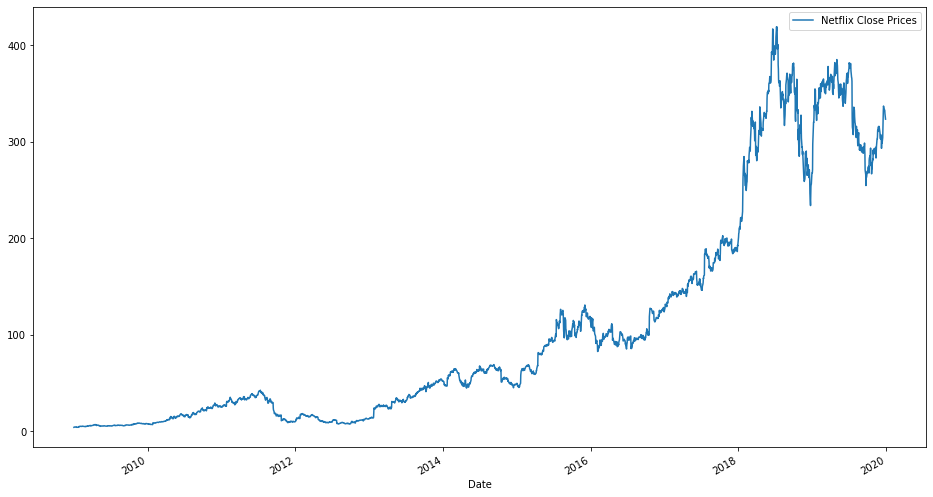

In [4]:
netflix_close.plot(label="Netflix Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [5]:
# pct change

netflix_pct_change = netflix_close.pct_change()
netflix_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
2009-01-08    0.013452
Name: Close, dtype: float64

In [6]:
# which day had the worst single day returns

netflix_pct_change.idxmin()

Timestamp('2011-10-25 00:00:00')

In [7]:
# which day had the best single day returns

netflix_pct_change.idxmax()

Timestamp('2013-01-24 00:00:00')

In [8]:
# std to assess risk

netflix_pct_change.std()

0.03245135422393804

In [9]:
weights = np.arange(1,31) #this creates an array with integers 1 to 100 included

In [10]:
netflix_sma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
netflix_wma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
netflix_ema_30 = netflix_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

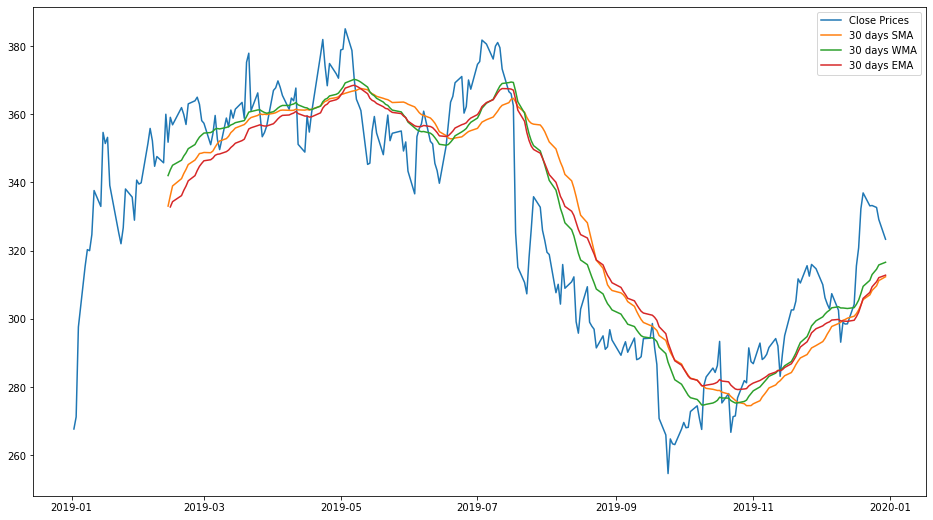

In [11]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(netflix_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(netflix_sma_30, label='30 days SMA')
ax.plot(netflix_wma_30, label='30 days WMA')
ax.plot(netflix_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [12]:
netflix_return_series = ((1 + netflix_adj_close.pct_change()).cumprod() - 1)
netflix_return_series

Date
2009-01-02          NaN
2009-01-05     0.069300
2009-01-06     0.102779
2009-01-07     0.095079
2009-01-08     0.109809
                ...    
2019-12-23    77.061603
2019-12-24    77.085040
2019-12-26    76.951459
2019-12-27    76.121862
2019-12-30    74.767326
Name: Adj Close, Length: 2767, dtype: float64

In [13]:
netflix_annualized_return = ((1+netflix_adj_close.tail(1))**(1/10))-1
netflix_annualized_return*100

Date
2019-12-30    78.277294
Name: Adj Close, dtype: float64

In [14]:
netflix_volatility = np.sqrt(np.log(netflix_close / netflix_close.shift(1)).var()) * np.sqrt(252)
netflix_volatility

0.5125871567784277

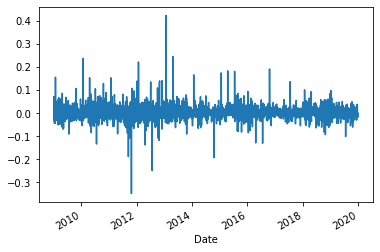

In [15]:
netflix_return_ts = netflix_adj_close.pct_change().dropna()
netflix_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,48.3%
Cumulative returns,7476.7%
Annual volatility,51.5%
Sharpe ratio,1.02
Calmar ratio,0.59
Stability,0.91
Max drawdown,-82.0%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


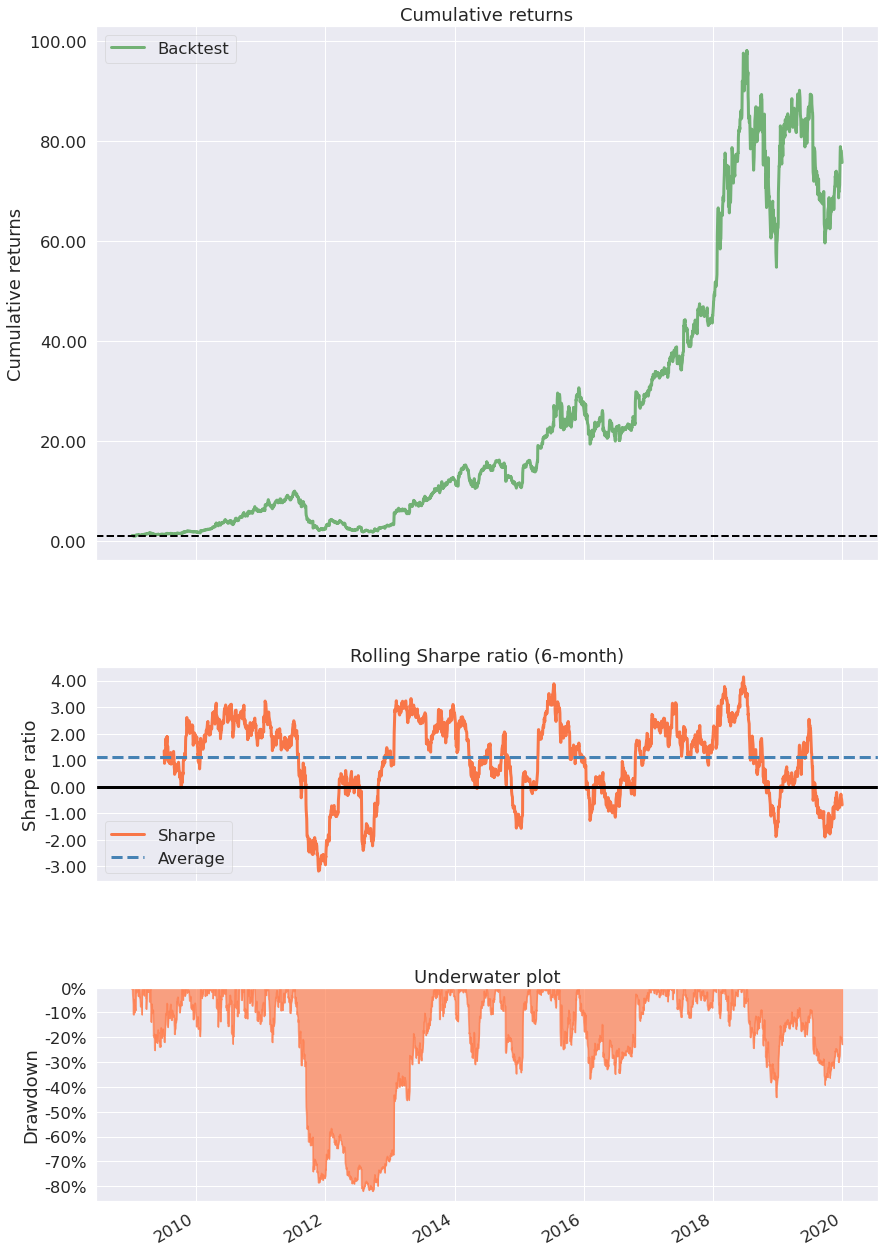

In [16]:
pf.create_simple_tear_sheet(netflix_return_ts)

# SG Stocks

## DBS

In [17]:
dbs_data = pdr.get_data_yahoo("D05.SI", start="2009-01-01", end="2019-12-31")
dbs_close = dbs_data["Close"]
dbs_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    8.69
2009-01-05    9.42
2009-01-06    9.56
2009-01-07    9.46
2009-01-08    8.99
Name: Close, dtype: float64

In [18]:
# check if 10x

round((dbs_close.tail(1).values / dbs_close.head(1).values)[0], 3)

2.972